In [1]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import timeit
from scipy import stats
import seaborn
from IPython.display import Image

Populating the interactive namespace from numpy and matplotlib


#### данные такси
www.nyc.gov/html/tlc/html/about/trip_record_data.shtml

In [2]:
taxi_may_16 = pd.read_csv("./data/yellow_tripdata_2016-05.csv")

In [3]:
print(taxi_may_16.shape)

(11836853, 19)


In [4]:
taxi_may_16.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76


In [5]:
taxi_may_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11836853 entries, 0 to 11836852
Data columns (total 19 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID               int64
store_and_fwd_flag       object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.7+ GB


In [6]:
taxi_may_16.isnull().values.any()

False

In [7]:
taxi_may_16.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07,1.183685e+07
mean,1.529075e+00,1.662265e+00,6.110069e+00,-7.304978e+01,4.024234e+01,1.045014e+00,-7.311869e+01,4.028127e+01,1.349840e+00,1.334066e+01,3.291893e-01,4.972577e-01,1.831982e+00,3.422044e-01,2.996838e-01,1.664095e+01
std,4.991539e-01,1.304418e+00,5.155162e+03,8.212003e+00,4.523904e+00,6.203209e-01,7.902544e+00,4.353644e+00,4.942504e-01,1.188799e+01,4.585669e-01,4.473578e-02,2.665043e+00,1.760303e+00,1.300760e-02,1.450379e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,-1.650819e+02,-4.456935e+01,1.000000e+00,-1.295732e+02,0.000000e+00,1.000000e+00,-4.100000e+02,-3.900000e+01,-2.700000e+00,-8.000000e+01,-1.500000e+01,-3.000000e-01,-4.103000e+02
25%,1.000000e+00,1.000000e+00,1.000000e+00,-7.399179e+01,4.073611e+01,1.000000e+00,-7.399116e+01,4.073457e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.760000e+00
50%,2.000000e+00,1.000000e+00,1.720000e+00,-7.398136e+01,4.075375e+01,1.000000e+00,-7.397922e+01,4.075439e+01,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.260000e+00,0.000000e+00,3.000000e-01,1.230000e+01
75%,2.000000e+00,2.000000e+00,3.270000e+00,-7.396588e+01,4.076862e+01,1.000000e+00,-7.396164e+01,4.077012e+01,2.000000e+00,1.500000e+01,5.000000e-01,5.000000e-01,2.450000e+00,0.000000e+00,3.000000e-01,1.836000e+01
max,2.000000e+00,9.000000e+00,1.200000e+07,1.184089e+02,5.366724e+01,9.900000e+01,0.000000e+00,7.012994e+01,5.000000e+00,8.007000e+03,7.900000e+01,4.030000e+01,7.500000e+02,1.120680e+03,3.100000e+00,8.007800e+03


In [6]:
print(type(taxi_may_16.iloc[0].tpep_dropoff_datetime))

<type 'str'>


##### записи в которых пассажира нет, длительность и расстояние поездки == 0 будут выброшены

In [9]:
print(taxi_may_16[taxi_may_16.passenger_count == 0].shape)
print(taxi_may_16[taxi_may_16.trip_distance == 0].shape)
print(taxi_may_16[taxi_may_16.tpep_pickup_datetime == taxi_may_16.tpep_dropoff_datetime].shape)

(604, 19)


#### 3.	Нью-Йорк вписан в прямоугольник от -74.25559 до -73.70001 градусов долготы и от 40.49612 до 40.91553 широты. Оставим лишь те поездки, которые были предприняты из этого пространства 

In [4]:
print(taxi_may_16[(-74.25559 <= taxi_may_16.pickup_longitude) & (taxi_may_16.pickup_longitude <= -73.70001 ) 
                   & (40.49612 <= taxi_may_16.pickup_latitude) & (taxi_may_16.pickup_latitude <= 40.91553)].shape)

(11686529, 19)


In [4]:
taxi_may_16.drop(taxi_may_16[taxi_may_16.passenger_count == 0].index, inplace=True)
taxi_may_16.drop(taxi_may_16[taxi_may_16.trip_distance == 0].index, inplace=True)
taxi_may_16.drop(taxi_may_16[taxi_may_16.tpep_pickup_datetime == taxi_may_16.tpep_dropoff_datetime].index, inplace=True)

In [7]:
taxi_may_16.shape

(11763422, 19)

In [8]:
taxi_may_16.drop(taxi_may_16[taxi_may_16.pickup_longitude < -74.25559].index, inplace=True)
taxi_may_16.drop(taxi_may_16[taxi_may_16.pickup_longitude > -73.70001].index, inplace=True)
taxi_may_16.drop(taxi_may_16[taxi_may_16.pickup_latitude < 40.49612].index, inplace=True)
taxi_may_16.drop(taxi_may_16[taxi_may_16.pickup_latitude > 40.91553].index, inplace=True)

In [12]:
taxi_may_16.shape

(11626521, 19)

In [77]:
regions = pd.read_csv("./data/regions.csv", delimiter=";")

In [14]:
regions.head()

,region,west,east,south,north
0,1,-74.25559,-74.244478,40.496120,40.504508
1,2,-74.25559,-74.244478,40.504508,40.512896
2,3,-74.25559,-74.244478,40.512896,40.521285
3,4,-74.25559,-74.244478,40.521285,40.529673
4,5,-74.25559,-74.244478,40.529673,40.538061


In [15]:
regions.shape

(2500, 5)

In [18]:
print(type(regions.iloc[0].west), type(taxi_may_16.iloc[0].pickup_latitude))

(<type 'numpy.float64'>, <type 'numpy.float64'>)


#### too long

In [42]:
latt = taxi_may_16.iloc[0].pickup_latitude
longi = taxi_may_16.iloc[0].pickup_longitude
reg = regions[(regions.west <= longi) & (longi < regions.east) & (regions.south <= latt) & (latt < regions.north)].region.values
print reg

[1233]


In [70]:
def check_region(taxi_data, regions):
    return regions[(regions.west <= taxi_data.pickup_longitude) & (taxi_data.pickup_longitude < regions.east) & 
                   (regions.south <= taxi_data.pickup_latitude) & (taxi_data.pickup_latitude < regions.north)].region.values[0]

In [55]:
#result = [check_region(taxi_may_16.iloc[i], regions) for i in range(2000)]

In [15]:
taxi_may_16[0:5]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76


In [15]:
#region = taxi_may_16.loc[:3000000].apply(lambda x: regions[(regions.west <= x.pickup_longitude) & 
#                                                            (x.pickup_longitude < regions.east) & 
#                                                            (regions.south <= x.pickup_latitude) & 
#                                                            (x.pickup_latitude < regions.north)].region.values[0], axis=1)

In [16]:
#taxi_may_16["region"] = region

#### much faster

In [20]:
NY_long_west = -74.25559
NY_long_east = -73.70001
NY_latt_south = 40.49612
NY_latt_north = 40.91553

In [18]:
def region_counter(longitude, latitude):
    long_num = np.ceil((longitude - NY_long_west)*50.0/(NY_long_east - NY_long_west))
    lat_num = np.ceil((latitude - NY_latt_south)*50.0/(NY_latt_north - NY_latt_south))
    
    return (long_num - 1) * 50.0 + lat_num

In [98]:
print(region_counter(-74.255585, 40.496125))

1.0


In [29]:
%%time
s = region_counter(taxi_may_16.pickup_longitude, taxi_may_16.pickup_latitude)

Wall time: 560 ms


In [30]:
taxi_may_16["region"] = s

In [31]:
taxi_may_16.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,region
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80,1233.0
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68,1180.0
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,1180.0
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96,1173.0
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76,1130.0


In [68]:
taxi_may_16.shape

(11626521, 20)

#### round hours

In [69]:
taxi_may_16["hour_statistic"] = pd.DatetimeIndex(taxi_may_16.tpep_pickup_datetime).map(lambda x: x.replace(minute=0, second=0))

In [70]:
taxi_may_16.shape

(11626521, 21)

In [71]:
taxi_may_16.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,region,hour_statistic
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,...,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80,1233.0,2016-05-01
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,...,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68,1180.0,2016-05-01
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,...,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,1180.0,2016-05-01
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,...,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96,1173.0,2016-05-01
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,...,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76,1130.0,2016-05-01


In [73]:
taxi_may_16.loc[1000].hour_statistic

Timestamp('2016-05-04 22:00:00')

In [108]:
taxi_may_16.columns

Index([u'VendorID', u'tpep_pickup_datetime', u'tpep_dropoff_datetime',
       u'passenger_count', u'trip_distance', u'pickup_longitude',
       u'pickup_latitude', u'RatecodeID', u'store_and_fwd_flag',
       u'dropoff_longitude', u'dropoff_latitude', u'payment_type',
       u'fare_amount', u'extra', u'mta_tax', u'tip_amount', u'tolls_amount',
       u'improvement_surcharge', u'total_amount', u'region',
       u'hour_statistic'],
      dtype='object')

In [114]:
taxi_may_16.to_csv("./data/edit_yellow_taxi_may_2016.csv", sep='\t', columns=["VendorID", "tpep_pickup_datetime", "tpep_dropoff_datetime", "passenger_count",
                                                 "trip_distance", "pickup_longitude", "pickup_latitude", "RatecodeID" ,
                                                 "store_and_fwd_flag", "dropoff_longitude", 'dropoff_latitude', 'payment_type',
                                                 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
                                                 'improvement_surcharge', 'total_amount', 'region', 'hour_statistic'])

#### make 2d statistics

In [2]:
#taxi_may_16_edit = pd.read_csv("./data/edit_yellow_taxi_may_2016.csv", sep='\t')
taxi_may_16_edit = pd.read_csv("./data/edit_yellow_taxi_may_2016.csv", sep='\t', usecols=["VendorID", "tpep_pickup_datetime", 
                            "tpep_dropoff_datetime", "passenger_count", "pickup_longitude", "pickup_latitude", "region", 
                                                                                   "hour_statistic"])

In [3]:
taxi_may_16_edit.shape

(11626521, 8)

In [4]:
taxi_may_16_edit.hour_statistic = pd.DatetimeIndex(taxi_may_16_edit.hour_statistic)

In [5]:
taxi_may_16_edit.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,region,hour_statistic
0,0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,...,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80,1233.0,2016-05-01
1,1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,...,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68,1180.0,2016-05-01
2,2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,...,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,1180.0,2016-05-01
3,3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,...,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96,1173.0,2016-05-01
4,4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,...,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76,1130.0,2016-05-01


In [6]:
taxi_may_16_edit[-5:]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,region,hour_statistic
11626516,11836837,2,2016-05-31 23:53:01,2016-06-01 00:00:24,2,1.89,-73.947876,40.774818,1,N,...,1,8.0,0.5,0.5,1.86,0.0,0.3,11.16,1384.0,2016-05-31 23:00:00
11626517,11836838,2,2016-05-31 23:53:02,2016-06-01 00:19:36,1,15.21,-73.789467,40.646942,1,N,...,1,42.0,0.5,0.5,8.66,0.0,0.3,51.96,2068.0,2016-05-31 23:00:00
11626518,11836839,2,2016-05-31 23:53:02,2016-05-31 23:59:07,1,1.80,-74.008659,40.719723,1,N,...,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,1127.0,2016-05-31 23:00:00
11626519,11836840,2,2016-05-31 23:53:03,2016-06-01 00:05:47,1,2.28,-73.981644,40.758862,1,N,...,1,11.0,0.5,0.5,2.46,0.0,0.3,14.76,1232.0,2016-05-31 23:00:00
11626520,11836841,1,2016-05-19 03:29:16,2016-05-19 03:31:24,1,0.60,-73.948959,40.586658,1,Y,...,2,4.0,0.5,0.5,0.00,0.0,0.3,5.30,1361.0,2016-05-19 03:00:00


In [7]:
taxi_may_16_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11626521 entries, 0 to 11626520
Data columns (total 22 columns):
Unnamed: 0               int64
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID               int64
store_and_fwd_flag       object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
region                   float64
hour_statistic           datetime64[ns]
dtypes: datetime64[ns](1), float64(13), int64(5), object(3)
memory usage: 1.9+ GB


In [8]:
taxi_may_16_edit.hour_statistic[0].value

1462060800000000000L

In [12]:
print("amount of unique regions in May month: ", np.unique(taxi_may_16_edit.region).shape[0])

('amount of unique regions in May month: ', 1217L)


In [5]:
time_bins = np.sort(np.unique(taxi_may_16_edit.hour_statistic)).astype(np.int64)

In [7]:
time_bins.shape # 31 day * 24 hour

(744,)

#### добавим 12-тый час последнего дня, что бы статистика получилась размером ровно в месяц 744

In [6]:
time_bins = np.hstack((time_bins, time_bins[-1] + 3600000000000))

#### посчитаем статистику по выездам и по количеству пассажиров

In [7]:
region_bined_stat = stats.binned_statistic_2d(taxi_may_16_edit.region, taxi_may_16_edit.hour_statistic.astype(np.int64), 
                                            "None", 'count', bins=[np.arange(1, 2502), time_bins])

In [8]:
region_bined_stat.statistic.shape

(2500, 744)

In [9]:
passanger_bined_stat = stats.binned_statistic_2d(taxi_may_16_edit.region, taxi_may_16_edit.hour_statistic.astype(np.int64), 
                                            taxi_may_16_edit.passenger_count, 'sum', bins=[np.arange(1, 2502), time_bins])

#### а еще можно построить статистику по часам суток - почасовая сумма выездов за весь месяц

In [10]:
taxi_may_16_edit["day_hours"] = taxi_may_16_edit["hour_statistic"].apply(lambda x: x.hour)

In [26]:
taxi_may_16_edit.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,region,hour_statistic,day hours,day_hours
0,0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,...,0.5,0.5,1.50,0.0,0.3,17.80,1233.0,2016-05-01,0,0
1,1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,...,0.5,0.5,0.88,0.0,0.3,9.68,1180.0,2016-05-01,0,0
2,2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,...,0.5,0.5,1.56,0.0,0.3,9.36,1180.0,2016-05-01,0,0
3,3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,...,0.5,0.5,3.66,0.0,0.3,21.96,1173.0,2016-05-01,0,0
4,4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,...,0.5,0.5,1.46,0.0,0.3,8.76,1130.0,2016-05-01,0,0


In [11]:
hour_bins = np.hstack((np.sort(np.unique(taxi_may_16_edit.day_hours)), 24))

In [14]:
print(hour_bins)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


In [12]:
reg_hour_stat = stats.binned_statistic_2d(taxi_may_16_edit.region, taxi_may_16_edit.day_hours, 
                                            "None", 'count', bins=[np.arange(1, 2502), hour_bins])

In [84]:
#http://www.mapdevelopers.com/geocode_bounding_box.php

### Статистика по вызовам такси в обычном масштабе и масштабе кубического корня

Text(159,0.5,'NY regions')

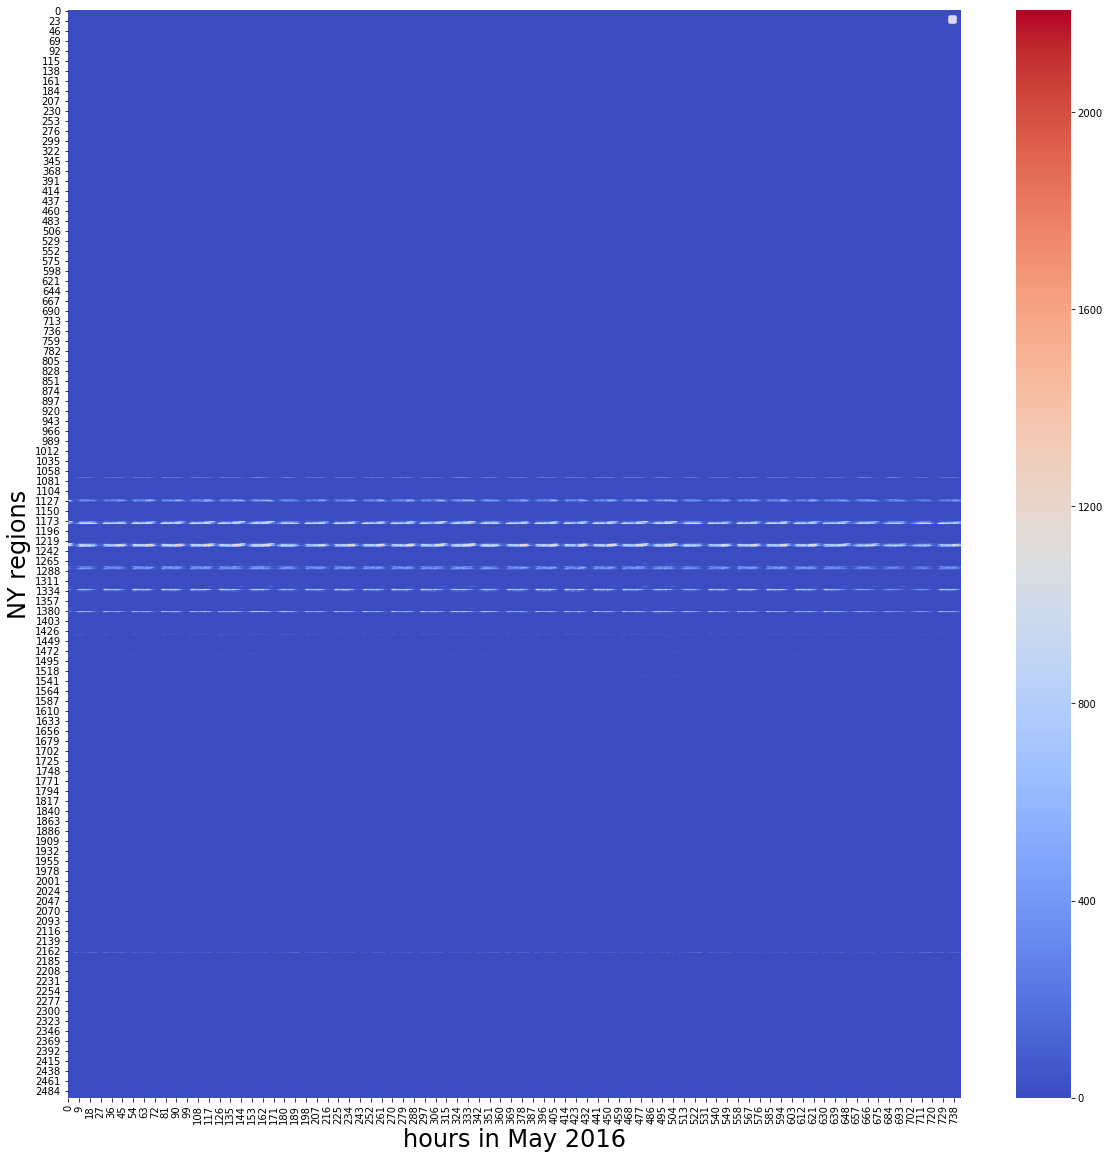

In [36]:
plt.figure(figsize=(20, 20))
seaborn.heatmap(region_bined_stat.statistic, cmap='coolwarm')
plt.legend("hour-NY region taxi counter")
plt.xlabel('hours in May 2016', fontsize=24)
plt.ylabel('NY regions', fontsize=24)

Text(159,0.5,'NY regions')

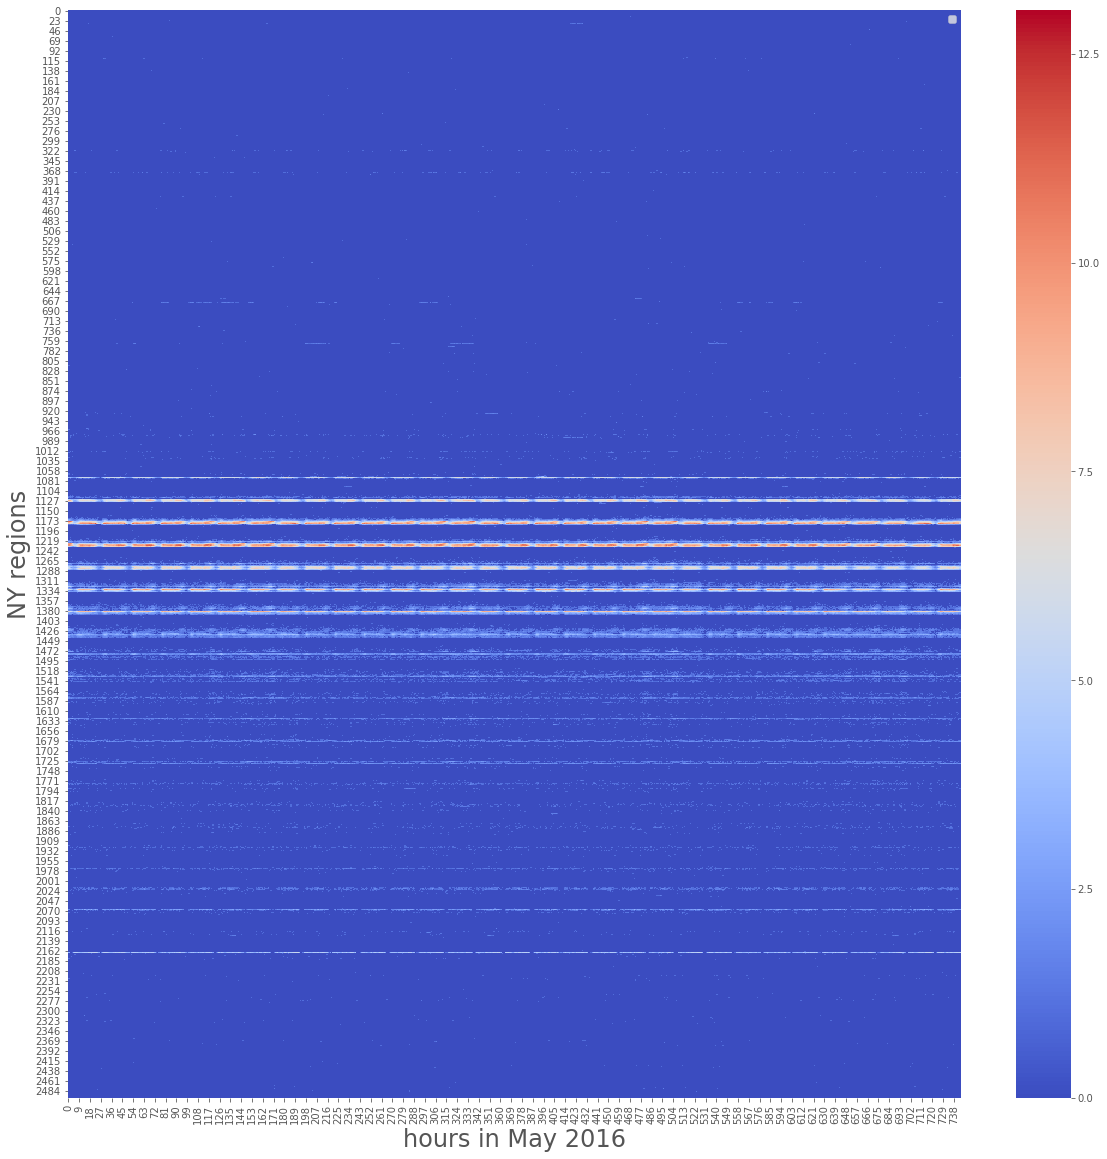

In [89]:
plt.figure(figsize=(20, 20))
seaborn.heatmap(np.cbrt(region_bined_stat.statistic), cmap='coolwarm')
plt.legend("hour-NY region taxi counter")
plt.xlabel('hours in May 2016', fontsize=24)
plt.ylabel('NY regions', fontsize=24)

### Статистика по пассажирам

Text(159,0.5,'NY regions')

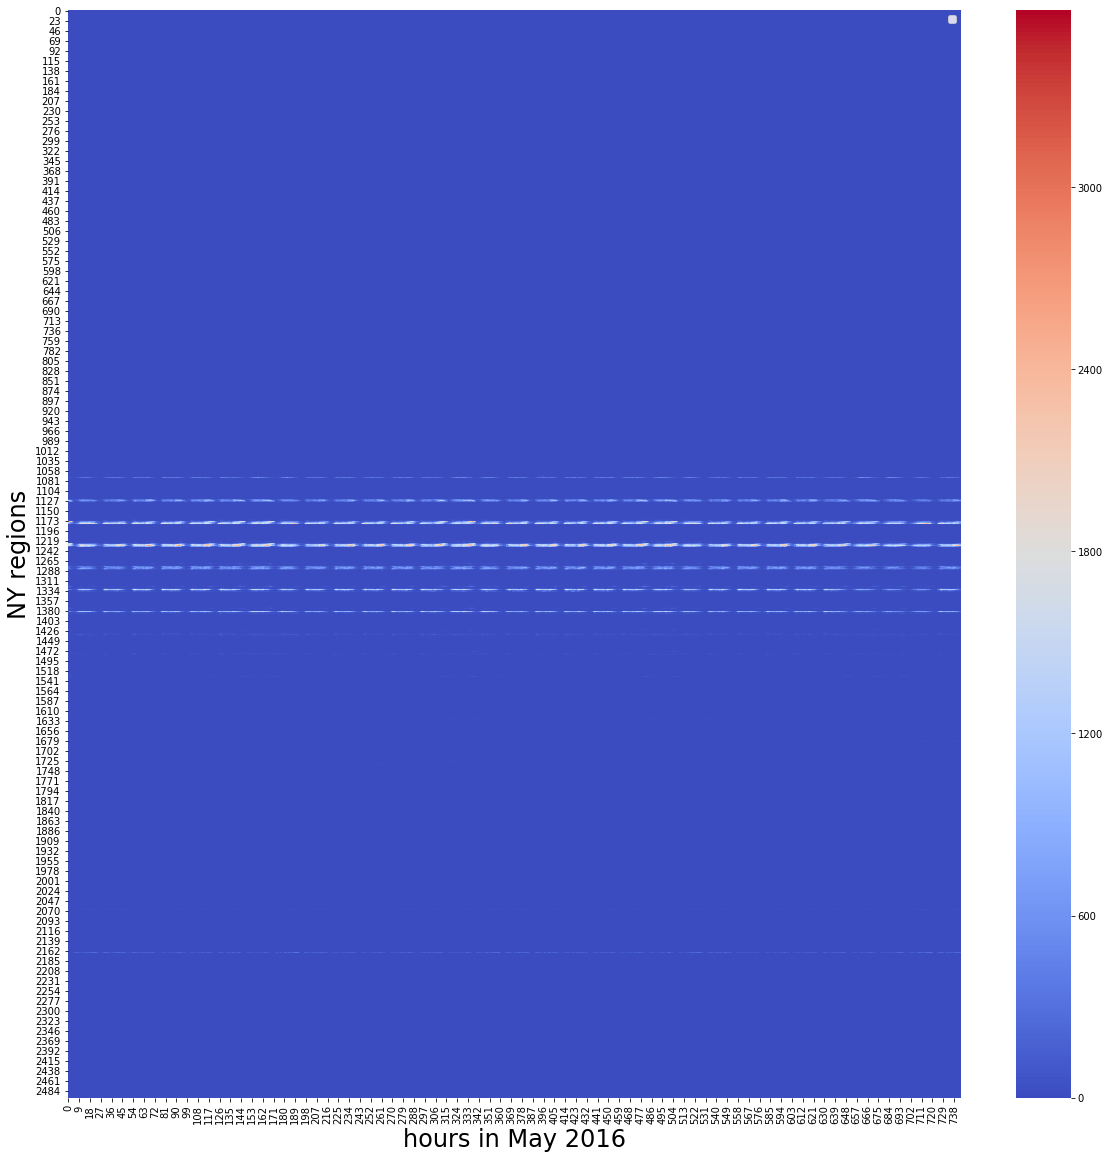

In [12]:
plt.figure(figsize=(20, 20))
seaborn.heatmap(passanger_bined_stat.statistic, cmap='coolwarm')
plt.legend("hour-NY region taxi counter")
plt.xlabel('hours in May 2016', fontsize=24)
plt.ylabel('NY regions', fontsize=24)

### Аккумулятивная суточная статистика за май 2016 по вызовам такси в обычном и логарифмическом масштабе

Text(159,0.5,'NY regions')

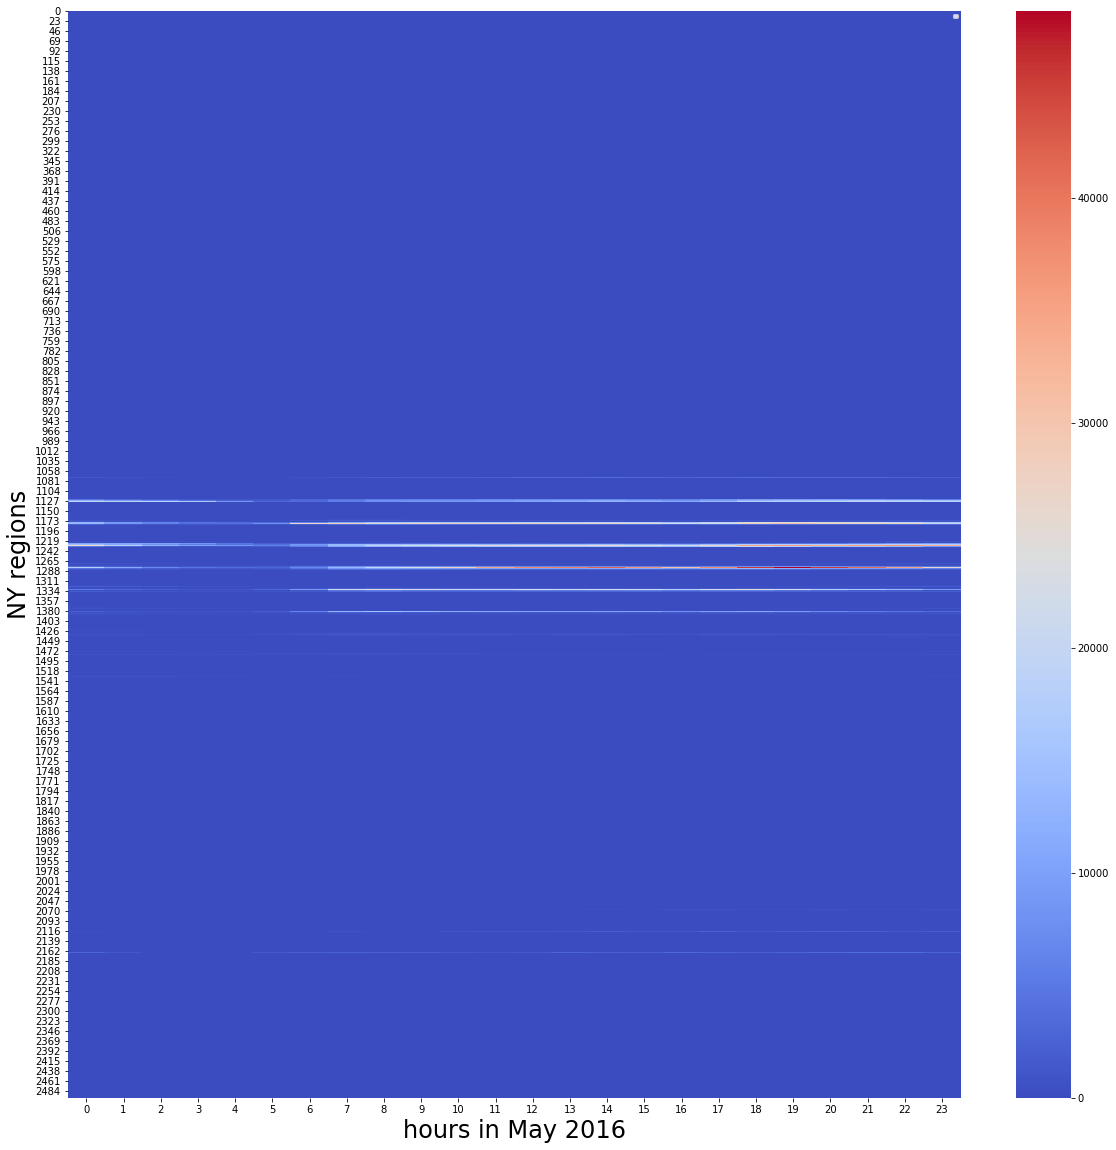

In [14]:
plt.figure(figsize=(20, 20))
seaborn.heatmap(reg_hour_stat.statistic, cmap='coolwarm')
plt.legend("24 hour region taxi counter", prop={'size': 6})
plt.xlabel('hours in May 2016', fontsize=24)
plt.ylabel('NY regions', fontsize=24)

Text(159,0.5,'NY regions')

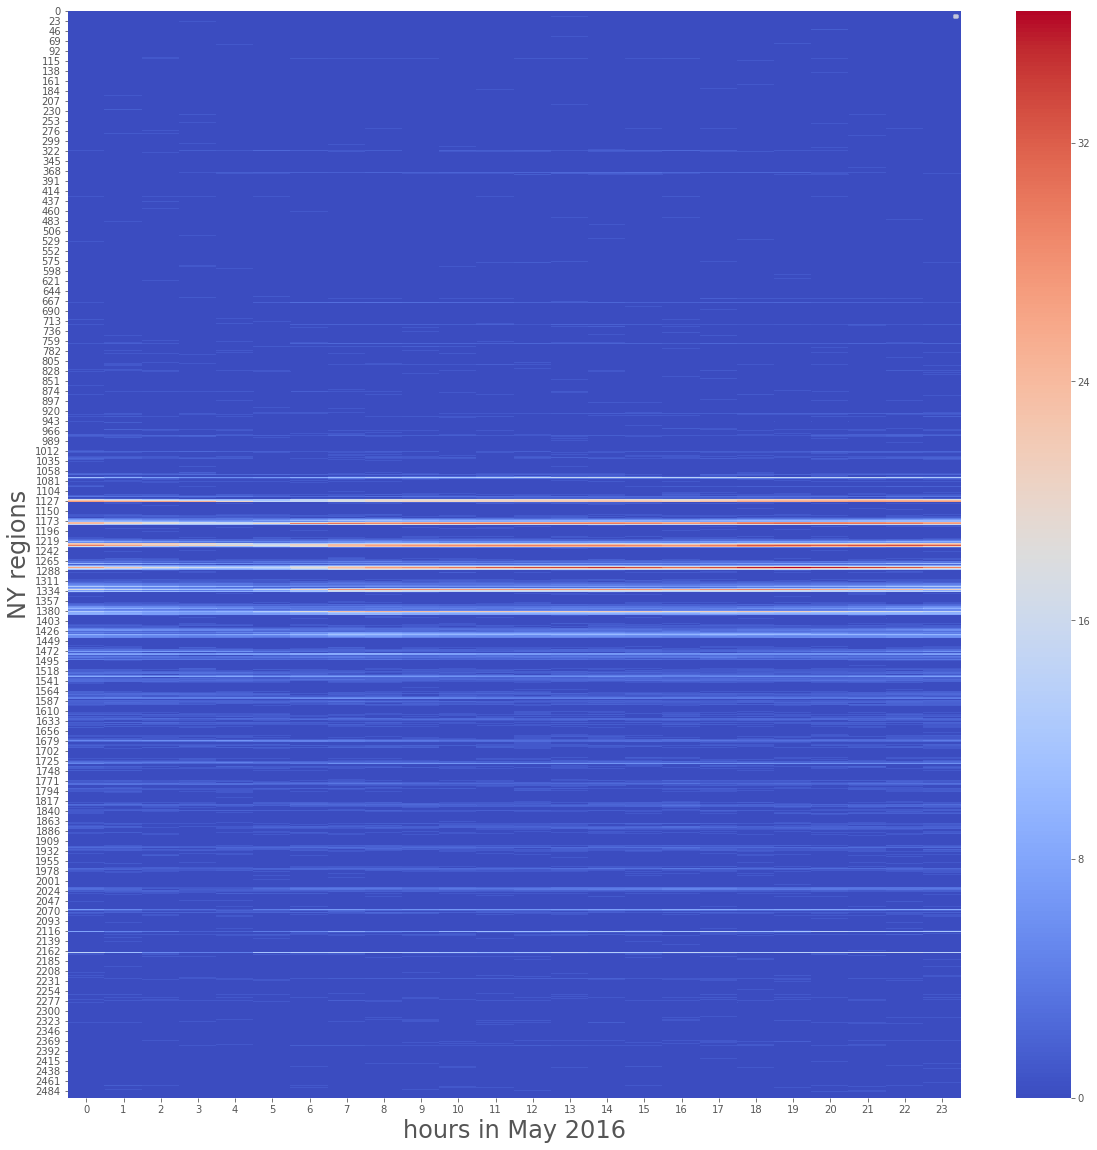

In [88]:
plt.figure(figsize=(20, 20))
seaborn.heatmap(np.cbrt(reg_hour_stat.statistic), cmap='coolwarm')
plt.legend("24 hour region taxi counter", prop={'size': 6})
plt.xlabel('hours in May 2016', fontsize=24)
plt.ylabel('NY regions', fontsize=24)

### Куммулятивная карта поездок за май 2016 
#### для сглаживания результата был взят кубический корень

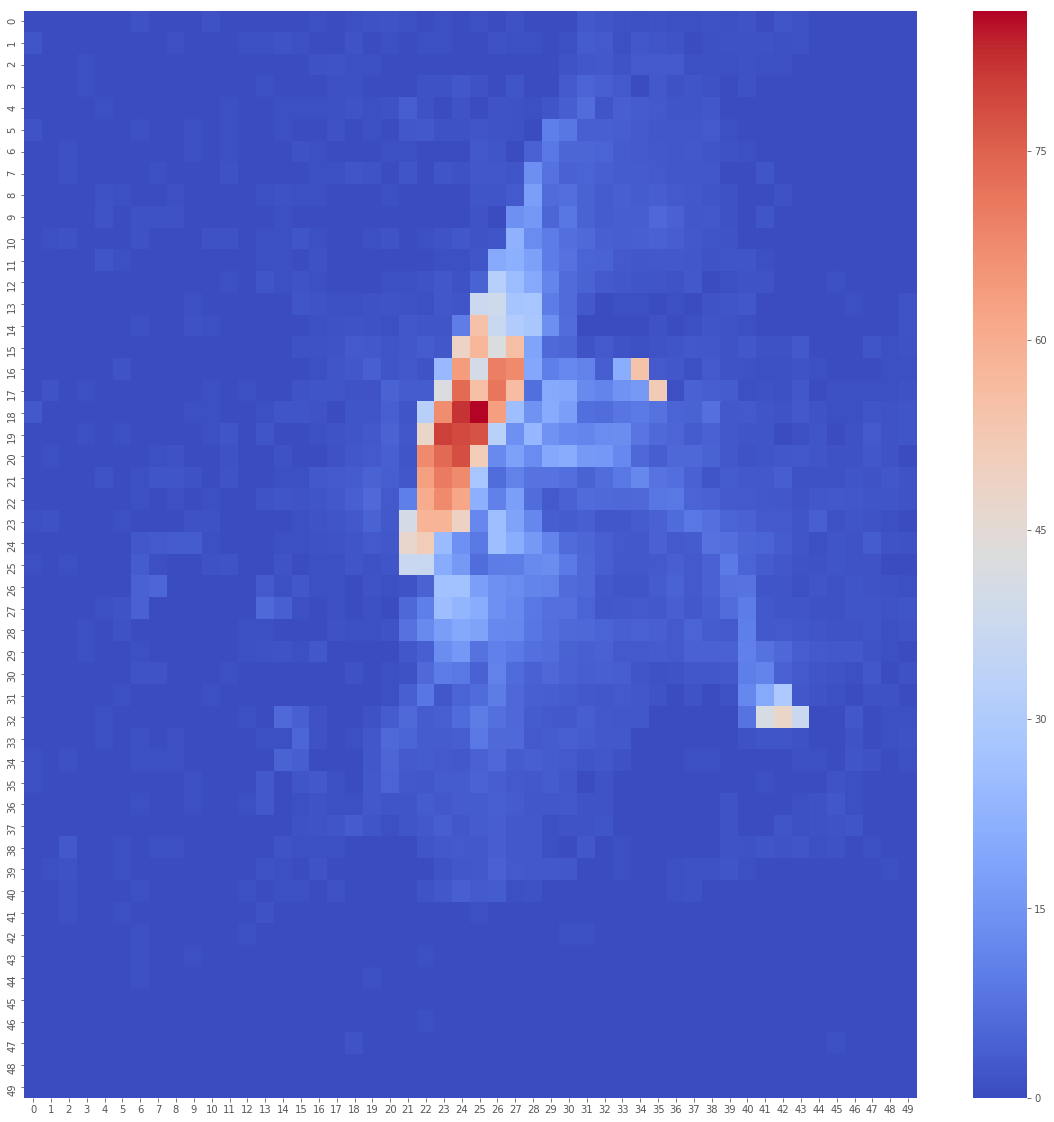

In [74]:
plt.figure(figsize=(20, 20))
seaborn.heatmap(np.cbrt(np.rot90(np.reshape(reg_hour_stat.statistic.sum(axis=1), (-1, 50)))), cmap='coolwarm')

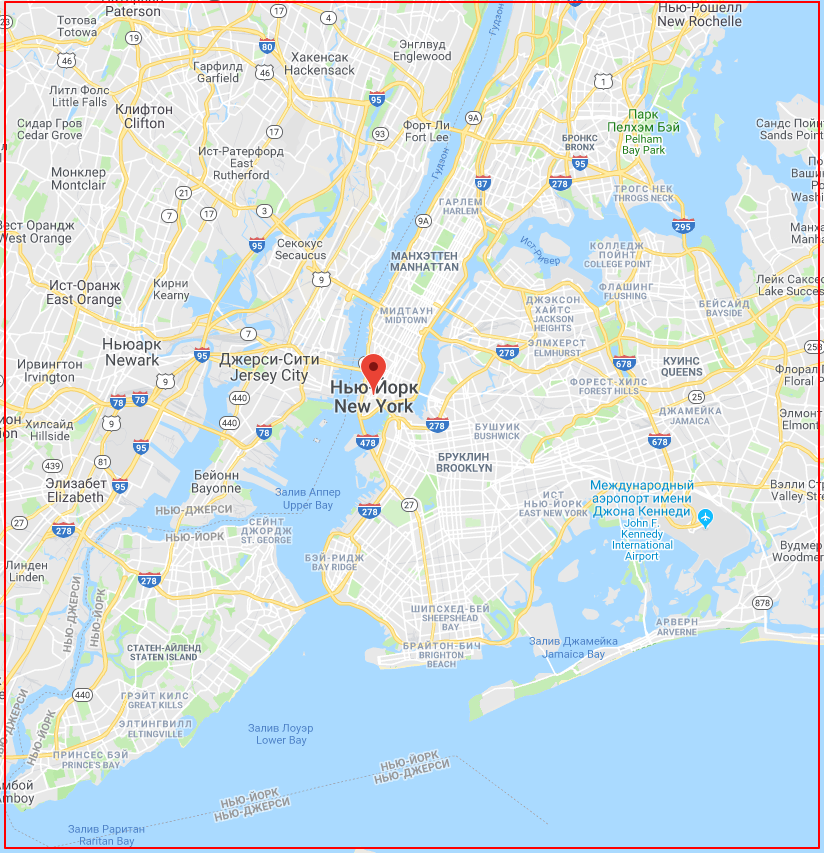

In [42]:
Image("./data/new york.png")

##### "heatmap" для нескольких центральных регионов для первого дня мая 2016

Text(195,0.5,'NY regions')

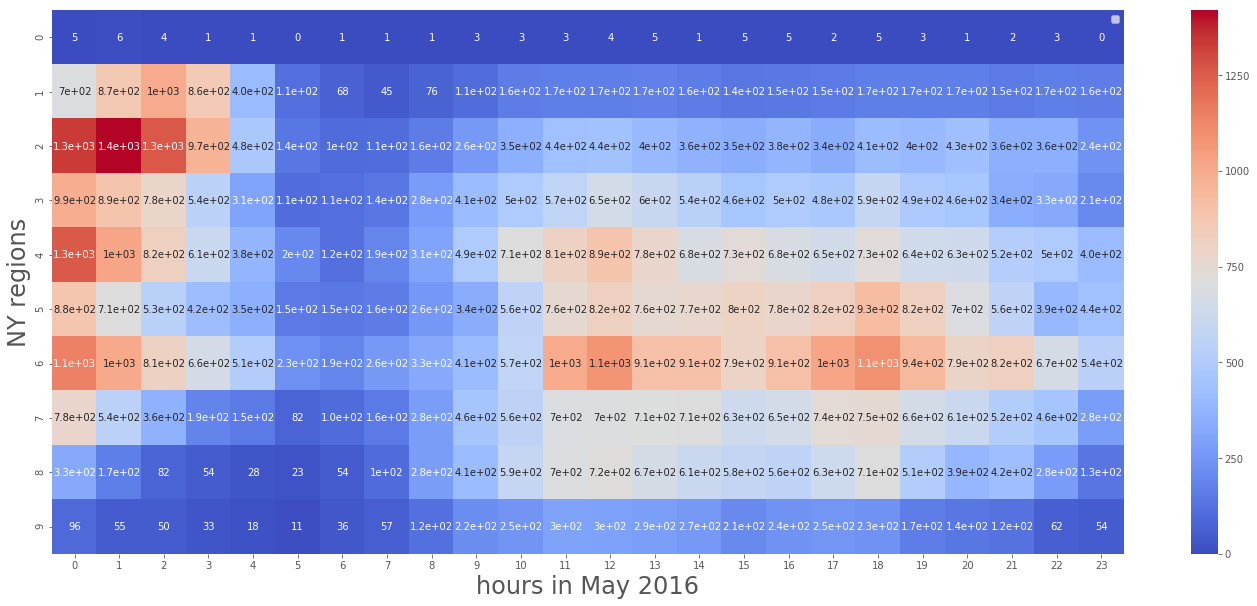

In [65]:
plt.figure(figsize=(24,10))
seaborn.heatmap(region_bined_stat.statistic[1225:1235, :24], annot=True, cmap='coolwarm')
plt.legend("hour-NY region taxi counter")
plt.xlabel('hours in May 2016', fontsize=24)
plt.ylabel('NY regions', fontsize=24)

### Empire State Building 40.748441° N,   -73.985664° W

In [78]:
print("Empire State building region: ", regions[(regions.west <= -73.985664) & (-73.985664 < regions.east) & 
                                                (regions.south <= 40.748441) & (40.748441 < regions.north)].region.values)

Empire State building region:  [1231]


In [79]:
ESB_reg = 1231

### почасовые графики поездок из квадрата в котором находится Empire State Building

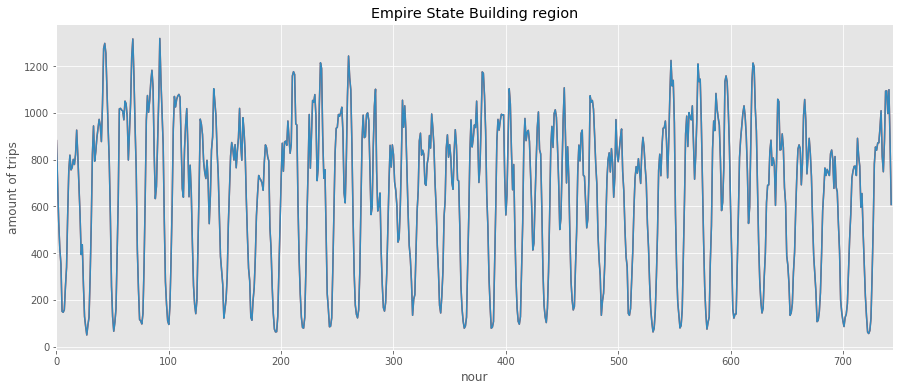

In [82]:
plt.figure(figsize=(15,6))
plt.plot(np.arange(744), region_bined_stat.statistic[ESB_reg-1,:])
plt.plot(np.arange(744), region_bined_stat.statistic[ESB_reg-1,:])
plt.xlim([0,745])
plt.ylabel("amount of trips")
plt.xlabel("hour")
plt.title("Empire State Building region");

### 1 мая 2016 года - воскресенье

### подсчитаем количество ячеек из которых было 0 поездок

In [87]:
print("all regions: ", np.prod(region_bined_stat.statistic.shape))
print("zero regions: ", np.prod(region_bined_stat.statistic.shape) - np.count_nonzero(region_bined_stat.statistic))

all regions:  1860000
zero regions:  1718238


In [13]:
#del bined_statistic
del taxi_may_16_edit